# Libraries

In [42]:
# pip install fastparquet
# pip install pyarrow

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fastparquet
import pyarrow
import warnings
warnings.filterwarnings('ignore')

# File size
 - pd.read_pickle( ) & df.to_pickle( )
 - pickle: binary 타입으로 저장
 - csv/excel vs. pickle
   - csv/excel
     - better for 숫자, 단어로 이루어진 정형화된 데이터
     - MS Excel로 데이터를 다루고 싶을 때 이용
     - pickle보다 속도는 느리고 file size는 더 크다.
     - 데이터를 다시 불렀을 때, 저장했을 때 형태가 다를 수 있다.
   - pickle
     - work well with 장문 텍스트, 단문 텍스트 등의 비정형 데이터
     - work well with 리스트/데이터프레임 등을 포함한 데이터
     - python pandas를 이용해 데이터를 다루고 싶을 때 이용
     - Excel보다 속도는 빠르고 file size는 작다.
     - python 외의 다른 언어에서는 다룰 수 없다.
 - References
   - https://wikidocs.net/161041

#### saveAsParquet( df, fpath, p )

In [62]:
def saveAsParquet(df, fpath, p=True):
    tic = time.time()
    df.to_parquet(os.path.join(fpath), compression='gzip')
    toc = time.time()
    if p == True:
        print('*** It took {:4f} seconds to save dataframe as pickle file.'.format(toc-tic))
    else:
        pass
        
# usage example
# parquet 데이터: column내 데이터타입이 같아야 함 >> df({'a':['cde', 1]})의 경우 error
df = pd.DataFrame({'a':['cde', 'abc'], 'b':[3231, 1231]})
fpath = './test.parquet.gzip'
saveAsParquet(df, fpath)

*** It took 0.003693 seconds to save dataframe as pickle file.


#### readParquet(df, fpath, p)

In [63]:
def readParquet(fpath, p=True):
    tic = time.time()
    df = pd.read_parquet(fpath)
    toc = time.time()
    if p==True:
        print('*** It took {:4f} seconds to read the pickle file.'.format(toc-tic))
    else:
        pass
    return df

# usage example
fpath = './test.parquet.gzip'
readParquet(fpath)

*** It took 0.005109 seconds to read the pickle file.


,a,b
0,cde,3231
1,abc,1231


#### saveAsPickle( df, fpath, p )

In [64]:
def saveAsPickle(df, fpath, p=True):
    tic = time.time()
    df.to_pickle(os.path.join(fpath))
    toc = time.time()
    if p == True:
        print('*** It took {:4f} seconds to save dataframe as pickle file.'.format(toc-tic))
    else:
        pass
    
    
# usage example
df = pd.DataFrame({'a':[1, 'abc'], 'b':[3231, 'bdsf']})
fpath = './test914.pkl'
saveAsPickle(df, fpath)

*** It took 0.001713 seconds to save dataframe as pickle file.


#### readPickle( fpath, p )

In [65]:
def readPickle(pkl_fpath, p=True):
    tic = time.time()
    df = pd.read_pickle(pkl_fpath)
    toc = time.time()
    if p==True:
        print('*** It took {:4f} seconds to read the pickle file.'.format(toc-tic))
    else:
        pass
    return df
    
# usage example
fpath = './test914.pkl'
readPickle(fpath)

*** It took 0.001214 seconds to read the pickle file.


,a,b
0,1,3231
1,abc,bdsf


#### getKeyColCand( df ) 

In [66]:
def getKeyColCand(df):
    li_key_col_cand = []
    for col in df.columns:
        if df.shape[0] - df[col].nunique() == 0:
            li_key_col_cand.append(col)
        else:
            pass
    print('*** key column candidates: {}'.format(li_key_col_cand))
    return li_key_col_cand


# usage example
df = pd.DataFrame({'a':[111, '222', '333'], 'b':['abc', 'def', 'abc']})
getKeyColCand(df)

*** key column candidates: ['a']


['a']

#### nullCheckForLoop( df )

In [67]:
def nullCheckForLoop(df):
    all_null_sum = 0
    for col in df.columns :        
        all_null_sum = all_null_sum + df[col].isnull().sum()
    if all_null_sum == 0:
        print('*** There is no null value in the DataFrame.')
    else:
        print("*** How many null values?")
        for col in df.columns :
            print("** column '{}' : {:.2f}%".format(col, 100*(df[col].isnull().sum() / df[col].shape[0])))
            
df = pd.DataFrame({'a':[111, '222', '333'], 'b':['abc', 'def', 'abc']})
df.iloc[0,1] = np.nan
nullCheckForLoop(df)

*** How many null values?
** column 'a' : 0.00%
** column 'b' : 33.33%


#### colNameChange(str_col_name)

In [68]:
def colNameChange(df, lower=True, space_underbar=True):   # x: str
    cols = pd.Series(df.columns)
    if lower==True:
        cols = cols.apply(lambda x: x.lower())                      
    if space_underbar==True:
        cols = cols.apply(lambda x: x.replace(' ', '_'))
    df.columns = cols
    return df
                                
df = pd.DataFrame({'AbcDE':[111, '222'], 'A space B':['abc', 'def']})
colNameChange(df)

,abcde,a_space_b
0,111,abc
1,222,def


# Display

In [5]:
import pandas as pd

def h1(df):
    print(df.shape); display(df.head(1))
    
def t1(df):
    print(df.shape); display(df.tail(1))
    
def h1t1(df):
    print(df.shape); display(df.head(1), df.tail(1))

<hr>

In [69]:
#### Concatenate DFs

In [38]:
# # Sample Code
# file_names = ['users_0101_0131', 'users_0201_0228', 'users_0301_0331']

# read csv file & save as pickle file
# for kth_file in file_names:
#     df = pd.read_csv('./data/' + kth_file + '.csv', engine = 'python')
#     save_as_pickle(df, './data/' + kth_file + '.pkl')

# # read pickle file and load(assign) it in dictionary
# di = {}
# for kth_file in file_names:
#     key = kth_file.split(' ')[3].split('-')[0] + '_' + kth_file.split(' ')[3].split('-')[1]
#     di[key] = read_pickle('./data/' + kth_file + '.pkl')
    
# di.keys()

In [39]:
# # Sample Code (continued)
# display(  d['0101_0131'].shape, d['0201_0228'].shape, d['0301_0331'].shape  )

# sum(
#     (df['0101_0131'].columns != di['0201_0228'].columns).sum(),
#     (df['0101_0131'].columns != di['0301_0331'].columns).sum(),
#     (df['0201_0228'].columns != di['0301_0331'].columns).sum()
# )

In [40]:
# # Sample Code (continued)
# save_as_pickle(d, './data/FINAL_CONCATENATED_FILE_NAME.pkl')
# d.read_pickle('./data/FINAL_CONCATENATED_FILE_NAME.pkl')
# print(d.shape)
# d.head(2)

# (Viz) Pie Chart 

#### (1) plt.pie( 1d-array )

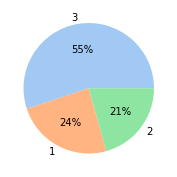

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def pie(df, column, tu_figsize):
    plt.figure(figsize=tu_figsize)
    plt.pie(x = df[column].value_counts().values,
            labels = df[column].value_counts().index,
            colors = sns.color_palette('pastel'),
            autopct='%.0f%%'
    )
    plt.show()
    
df_titanic = sns.load_dataset('titanic')
pie(df_titanic, 'pclass', tu_figsize=(3,3))

##### by hand / detailed

<Figure size 216x216 with 0 Axes>

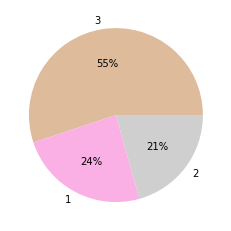

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')

plt.figure(figsize=(3,3))
fig, ax = plt.subplots(1,1)

s_values = df['pclass'].value_counts().values
s_labels = df['pclass'].value_counts().index
li_colors = sns.color_palette('pastel')[5:8]

plt.pie(x = s_values,            # 1-d array-like
        labels = s_labels,   # list
        colors = li_colors,  # array-like
        autopct = '%.0f%%')
plt.show()